In [1]:
from lab1.user_account_service import UserAccountService
from lab1.statistics_service import StatisticsService
from shared.log_service import LogService
from injector import Injector
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# 全局注入器对服务进行依赖注入
injector = Injector()
# 获取 用户账户服务 和 日志服务 及 统计服务
user_account_service = injector.get(UserAccountService)
log_service = injector.get(LogService)
statistics_service: StatisticsService  = injector.get(StatisticsService)

2018-09-25 18:50:42,456 - INFO - [LogService]:LogService initialized.
2018-09-25 18:50:42,468 - INFO - [LogService]:LogService initialized.


In [3]:
# 读取 csv 文件
raw_df = user_account_service.from_csv('bank.csv')

2018-09-25 18:50:42,549 - INFO - [UserAccountService]: read csv file from D:\workspace\impls\impls-data_mining\data_mining\comp3009\resource\lab1\bank.csv


In [4]:
# 数据概览
raw_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
# 第一问（编程实现）
for col in raw_df.columns.get_values():
    # 匹配数字类型，描述平均值，最大值，最小值，极差，带偏标准差，无偏标准差，带偏方差，无偏方差
    if user_account_service.is_numeric_series(raw_df[col]):
        user_account_service.numeric_describe(raw_df[col],col)
    # 匹配其他类型，描述众数，各因子频率
    else:
        user_account_service.factor_describe(raw_df[col],col)
    log_service.logger.info('--- seperator---')

2018-09-25 18:58:23,730 - INFO - [UserAccountService]: numeric series 'age' description
2018-09-25 18:58:23,733 - INFO - [UserAccountService]: mean - 41.17009511170095
2018-09-25 18:58:23,736 - INFO - [UserAccountService]: max - 87
2018-09-25 18:58:23,739 - INFO - [UserAccountService]: min - 19
2018-09-25 18:58:23,744 - INFO - [UserAccountService]: range - 68
2018-09-25 18:58:23,749 - INFO - [UserAccountService]: std - 10.575041217961282
2018-09-25 18:58:23,755 - INFO - [UserAccountService]: ustd - 10.52765390586051
2018-09-25 18:58:23,760 - INFO - [UserAccountService]: var - 111.83149676158004
2018-09-25 18:58:23,765 - INFO - [UserAccountService]: uvar - 110.83149676158004
2018-09-25 18:58:23,766 - INFO - --- seperator---
2018-09-25 18:58:23,768 - INFO - [UserAccountService]: factor series 'job' description
2018-09-25 18:58:23,771 - INFO - [UserAccountService]: mode - management 969
2018-09-25 18:58:23,774 - INFO - [UserAccountService]: freq - retired 0.050873700508737005
2018-09-25 1

2018-09-25 18:58:23,983 - INFO - [UserAccountService]: numeric series 'campaign' description
2018-09-25 18:58:23,984 - INFO - [UserAccountService]: mean - 2.793629727936297
2018-09-25 18:58:23,988 - INFO - [UserAccountService]: max - 50
2018-09-25 18:58:23,990 - INFO - [UserAccountService]: min - 1
2018-09-25 18:58:23,995 - INFO - [UserAccountService]: range - 49
2018-09-25 18:58:24,000 - INFO - [UserAccountService]: std - 3.1094627120970686
2018-09-25 18:58:24,004 - INFO - [UserAccountService]: ustd - 2.9442755234390106
2018-09-25 18:58:24,009 - INFO - [UserAccountService]: var - 9.668758357922059
2018-09-25 18:58:24,013 - INFO - [UserAccountService]: uvar - 8.668758357922059
2018-09-25 18:58:24,015 - INFO - --- seperator---
2018-09-25 18:58:24,016 - INFO - [UserAccountService]: numeric series 'pdays' description
2018-09-25 18:58:24,019 - INFO - [UserAccountService]: mean - 39.766644547666445
2018-09-25 18:58:24,022 - INFO - [UserAccountService]: max - 871
2018-09-25 18:58:24,025 - IN

In [6]:
# 第一问（pandas api 实现）
for col in raw_df.columns.get_values():
    print(raw_df[col].describe())

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64
count           4521
unique            12
top       management
freq             969
Name: job, dtype: object
count        4521
unique          3
top       married
freq         2797
Name: marital, dtype: object
count          4521
unique            4
top       secondary
freq           2306
Name: education, dtype: object
count     4521
unique       2
top         no
freq      4445
Name: default, dtype: object
count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64
count     4521
unique       2
top        yes
freq      2559
Name: housing, dtype: object
count     4521
unique       2
top         no
freq      3830
Name: loan, dtype: object
count         4

In [15]:
# 第二问
# job 属性频率分布直方图
from typing import Dict
job_mapping: Dict[str,int] = statistics_service.aggregate(raw_df.job)
job_mapping

{'retired': 230,
 'technician': 768,
 'entrepreneur': 168,
 'unknown': 38,
 'management': 969,
 'services': 417,
 'admin.': 478,
 'blue-collar': 946,
 'student': 84,
 'housemaid': 112,
 'unemployed': 128,
 'self-employed': 183}

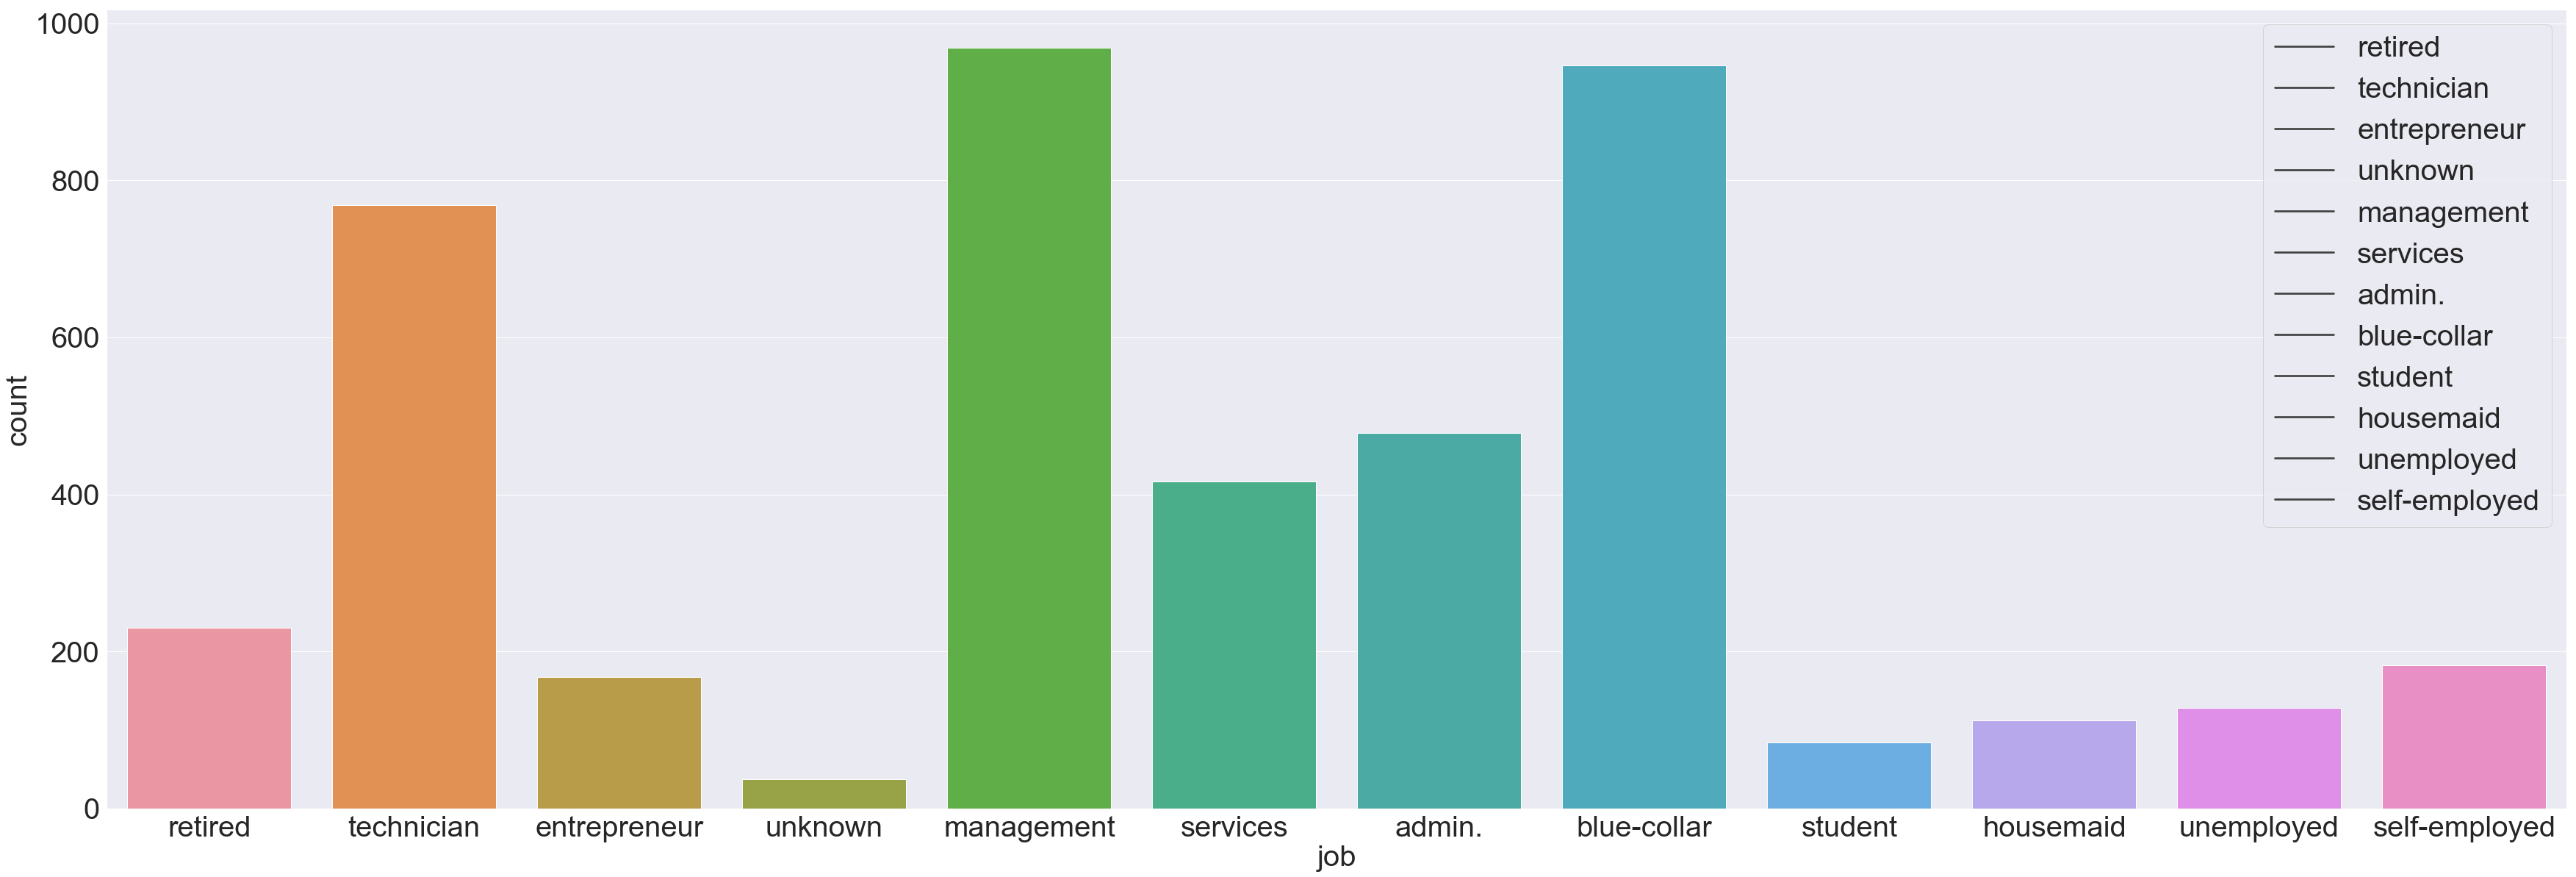

In [39]:
sns.set()
job_df = pd.DataFrame(data=list(map(lambda tup: list(tup),job_mapping.items())),columns=["job","count"])
plt.figure(figsize=(60,20)) 
ax = sns.barplot(x="job", y="count", data=job_df)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
# 设置坐标标签字体大小
ax.set_xlabel(r'job', fontsize=40)
ax.set_ylabel(r'count', fontsize=40)
# 设置图例字体大小
ax.legend(list(job_mapping.keys()),fontsize=40)
ax

D:\Code\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


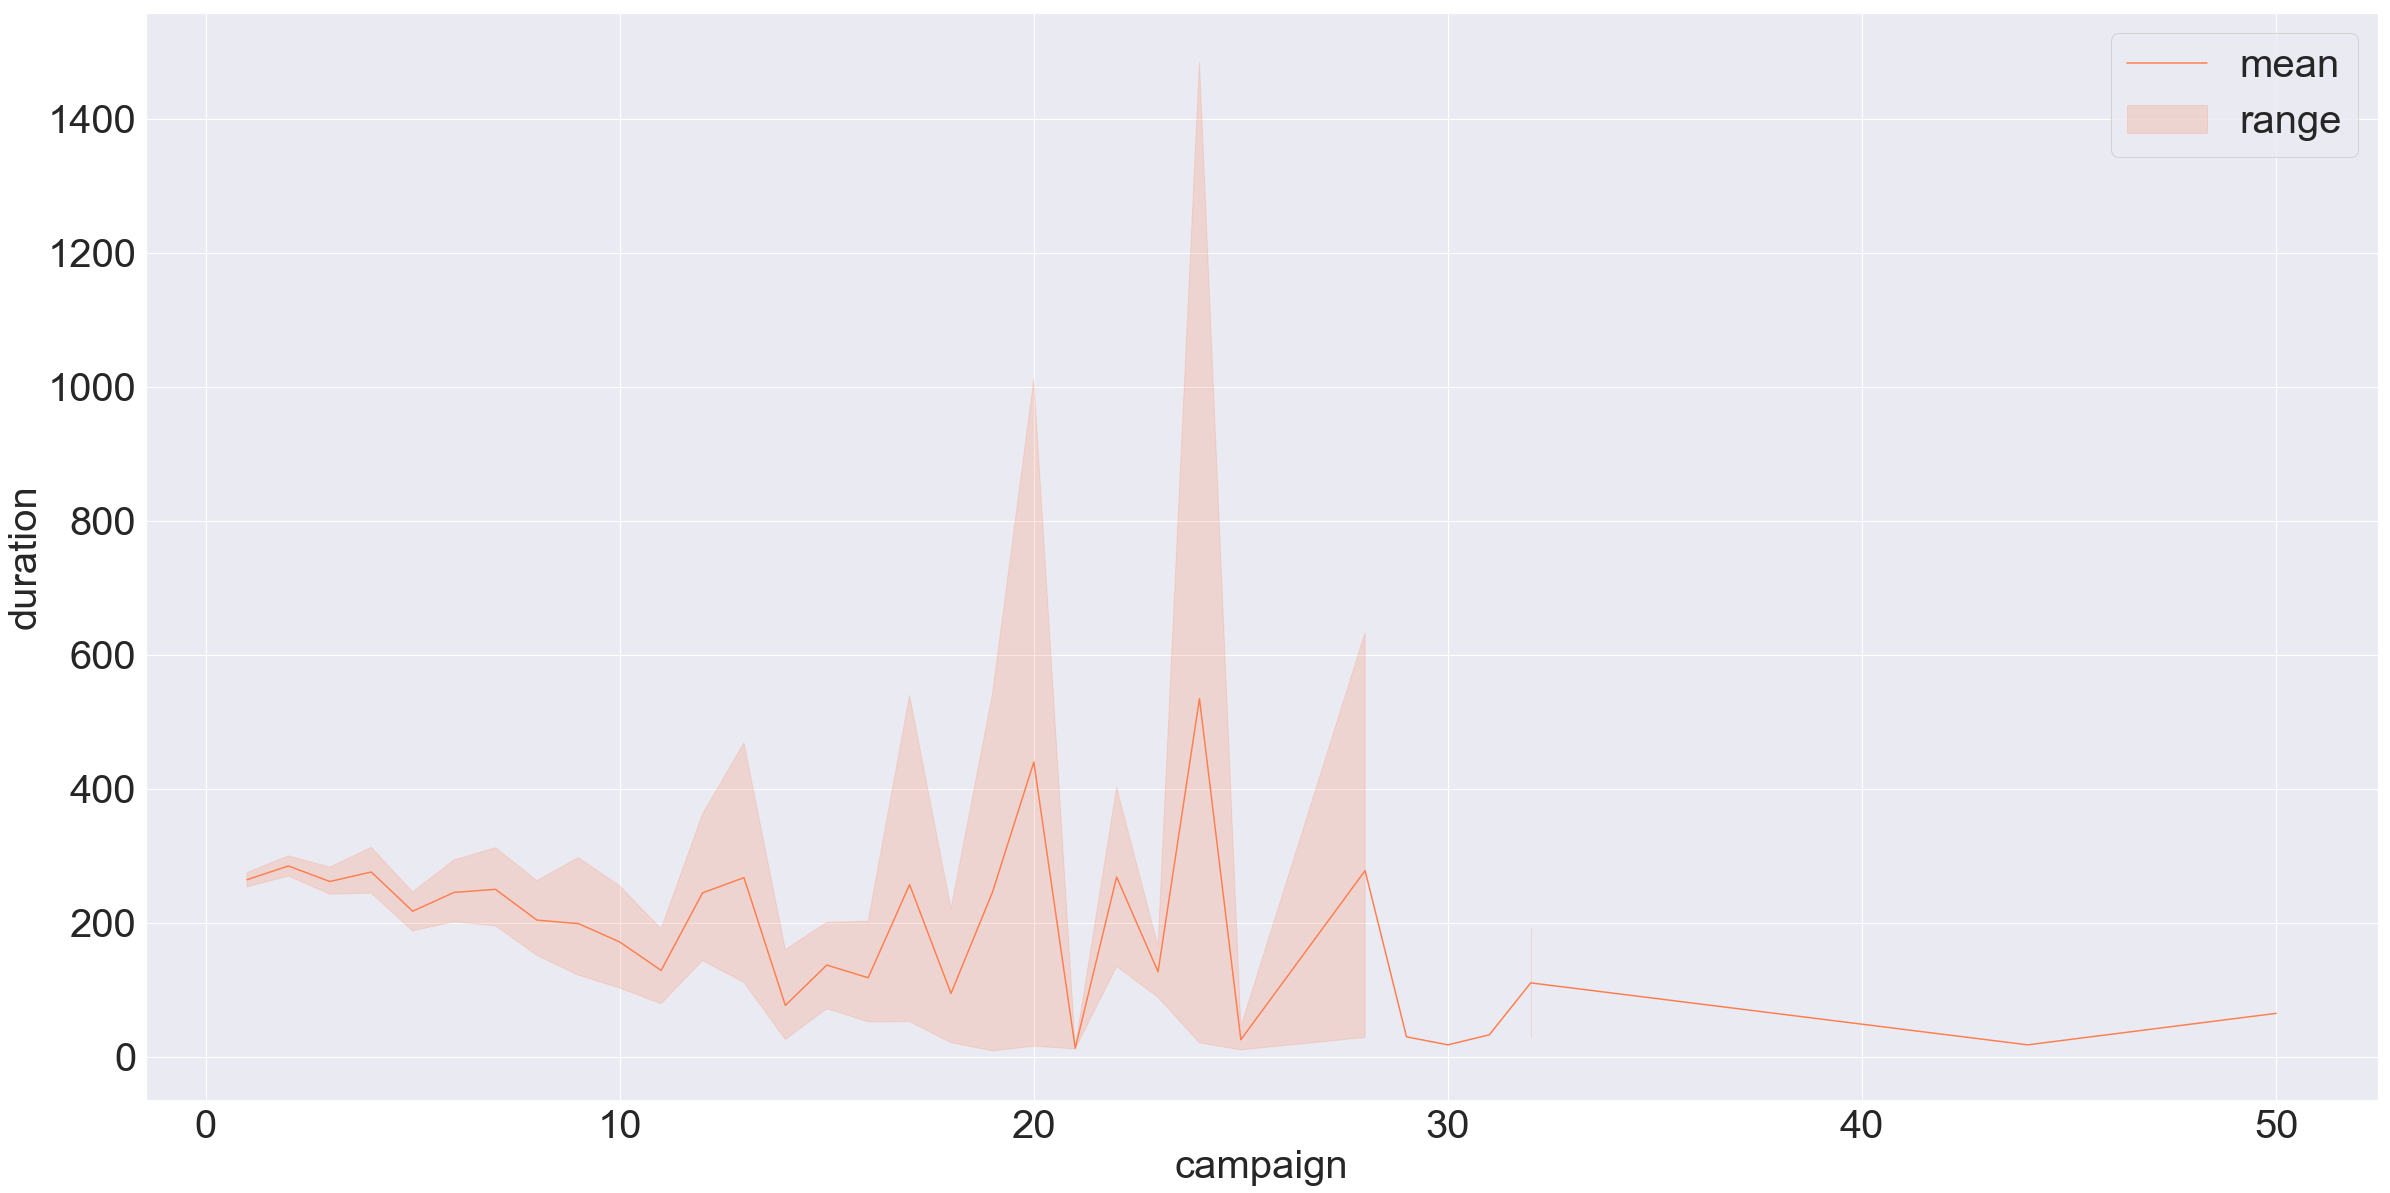

In [63]:
# 第二问（compaign和duration关系折线图）
plt.figure(figsize=(40,20)) 
ax = sns.lineplot(x="campaign", y="duration",data=raw_df,color="coral", label="line")
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
# 设置坐标标签字体大小
ax.set_xlabel(r'campaign', fontsize=40)
ax.set_ylabel(r'duration', fontsize=40)
# 设置图例字体大小
ax.legend(['mean','range'],fontsize=40)
ax

In [8]:
# 第三问（相关性分析）
# pearson 相关系数检验（ pearson法只能对连续型变量进行检验 ）
# 相关系数表
corr = raw_df.corr("pearson")
corr.style.background_gradient()

,age,balance,day,duration,campaign,pdays,previous
age,1,0.0838201,-0.0178526,-0.00236689,-0.0051479,-0.00889353,-0.00351092
balance,0.0838201,1,-0.00867705,-0.0159499,-0.00997617,0.00943668,0.0261964
day,-0.0178526,-0.00867705,1,-0.0246293,0.160706,-0.0943515,-0.0591144
duration,-0.00236689,-0.0159499,-0.0246293,1,-0.068382,0.0103802,0.0180803
campaign,-0.0051479,-0.00997617,0.160706,-0.068382,1,-0.0931368,-0.0678326
pdays,-0.00889353,0.00943668,-0.0943515,0.0103802,-0.0931368,1,0.577562
previous,-0.00351092,0.0261964,-0.0591144,0.0180803,-0.0678326,0.577562,1


D:\Code\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 2880x2880 with 0 Axes>

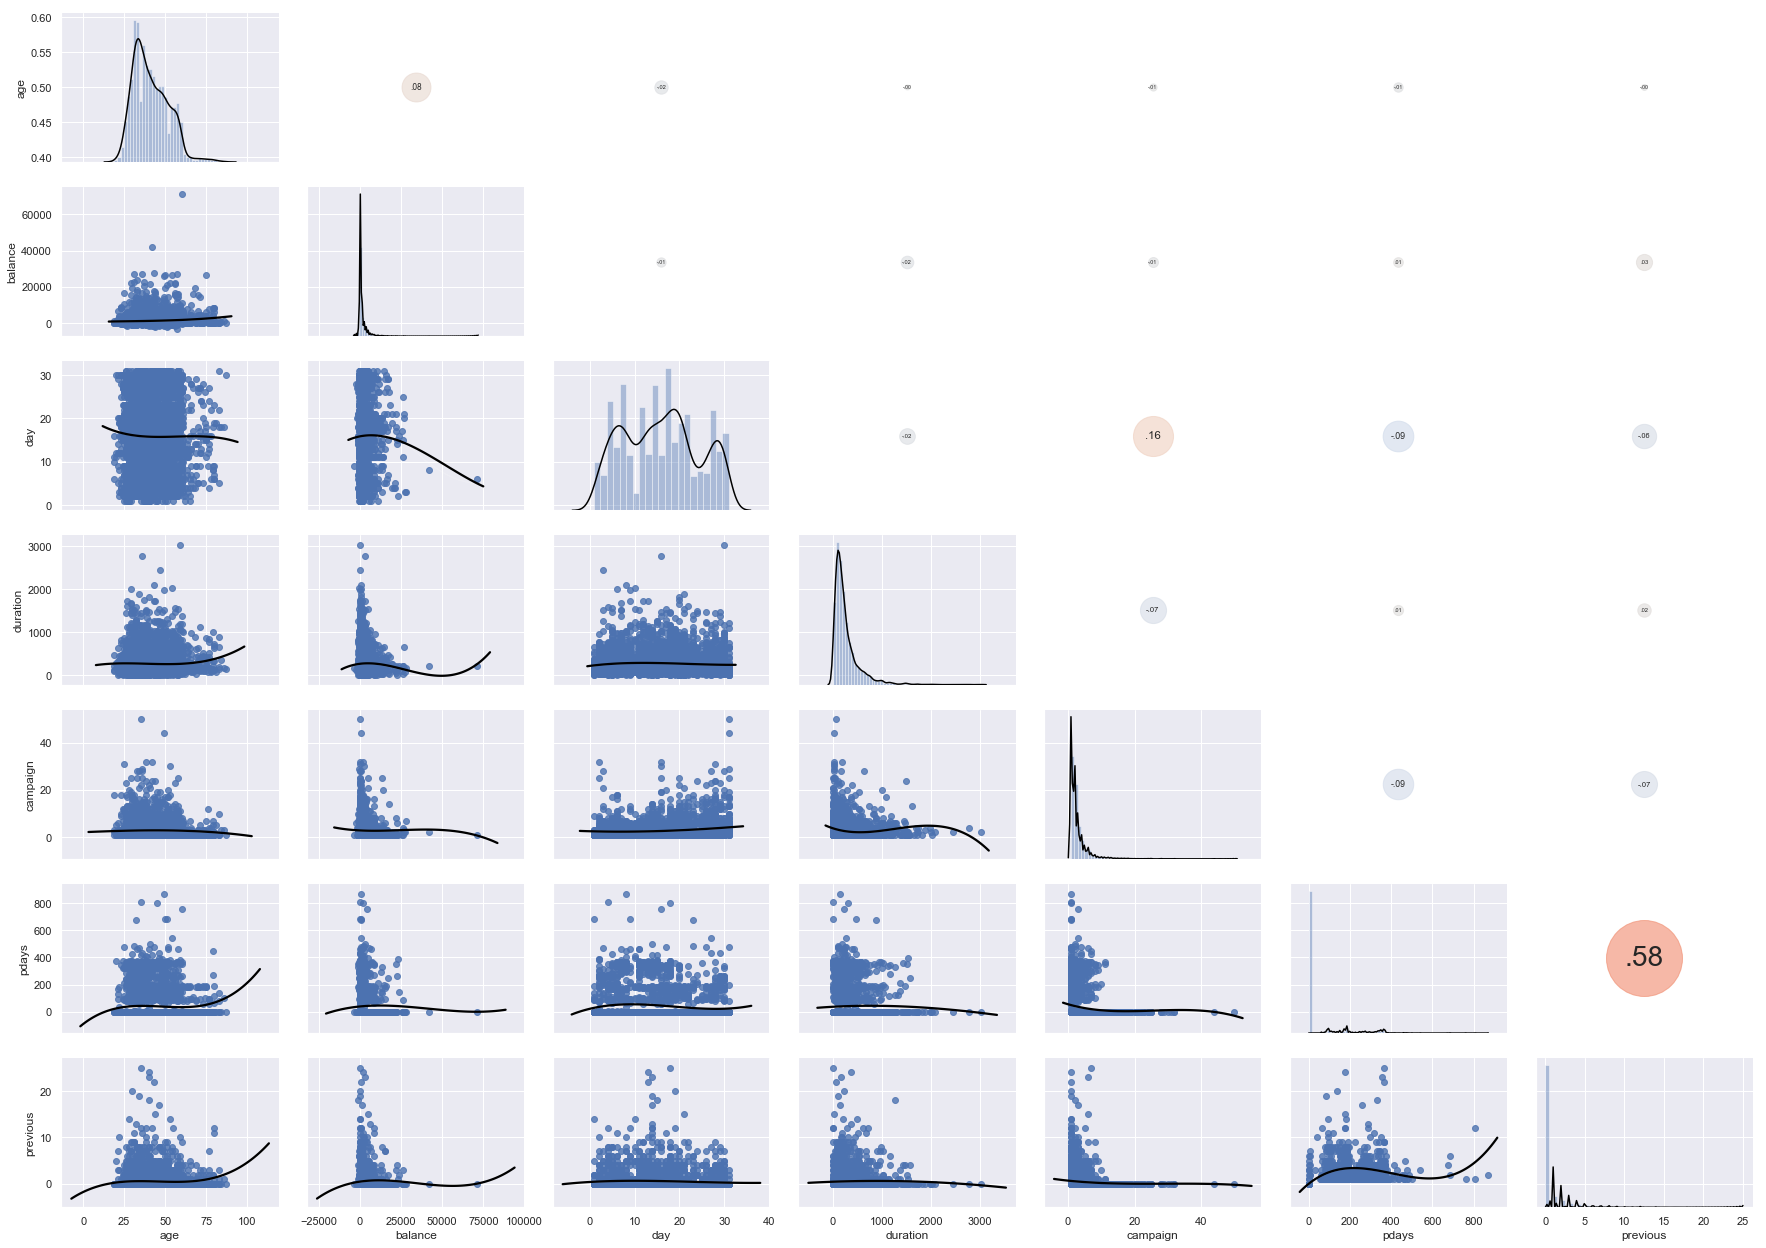

In [59]:
# 绘制 pearson 相关关系和回归图
statistics_service.draw_corr(raw_df,"pearson")

In [10]:
# 对 dataframe 进行的因子型变量（分类变量）数值化，便于 corr 分析
numeric_df = user_account_service.make_indexed_factors(raw_df)
numeric_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,0,2,0,1787,0,0,2,19,1,79,1,-1,0,2,0
1,33,5,0,3,0,4789,1,1,2,11,7,220,1,339,4,0,0
2,35,4,1,0,0,1350,1,0,2,16,2,185,1,330,1,0,0
3,30,4,0,0,0,1476,1,1,0,3,11,199,4,-1,0,2,0
4,59,7,0,3,0,0,1,0,0,5,7,226,1,-1,0,2,0


In [11]:
# 对变量进行 kendall tau 相关系数检验
# Kendall 系数又称一致性系数，是表示多列等级变量相关程度的一种方法
corr_k = numeric_df.corr("kendall")
corr_k.style.background_gradient()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1,-0.0983469,-0.174383,-0.0224538,-0.0132484,0.0515054,-0.134118,-0.000451592,-0.0349007,-0.0170313,0.0464096,-0.0248485,0.0188974,-0.000839726,0.000525649,-0.0211158,0.0134769
job,-0.0983469,1,-0.0366121,0.101438,-0.0057151,-0.0299363,0.0932126,-0.00188127,-0.0847399,-0.00809632,-0.0214056,0.00463655,-0.0117672,-0.0100711,-0.0152035,0.0249066,-0.0452699
marital,-0.174383,-0.0366121,1,-0.0383839,0.0440045,-0.0169151,-0.0322019,-0.0225819,0.0351056,-0.000451407,-0.0152014,0.0162552,-0.0321668,0.00906832,0.00893518,0.00892882,0.0619467
education,-0.0224538,0.101438,-0.0383839,1,0.0240647,-0.0698939,0.111988,0.0694706,-0.0788511,-0.000660516,-0.0568115,0.0209786,-0.0164015,-0.0073485,-0.0147856,0.0079126,-0.0409529
default,-0.0132484,-0.0057151,0.0440045,0.0240647,1,-0.137372,0.00688065,0.0639939,-0.0062947,-0.010699,-0.00715995,-0.0137857,0.0024832,-0.0350421,-0.0369758,0.0415208,0.00130265
balance,0.0515054,-0.0299363,-0.0169151,-0.0698939,-0.137372,1,-0.0253707,-0.0852166,0.00853834,-0.00796239,0.0658455,0.0359232,-0.0241339,0.0484032,0.0542714,-0.0332309,0.0646946
housing,-0.134118,0.0932126,-0.0322019,0.111988,0.00688065,-0.0253707,1,0.0184508,-0.182393,-0.0260388,-0.0801493,0.0112152,-0.030351,0.0750436,0.0584042,-0.0203995,-0.104683
loan,-0.000451592,-0.00188127,-0.0225819,0.0694706,0.0639939,-0.0852166,0.0184508,1,0.00746865,-0.00394104,-0.0598264,-0.00939113,0.00147443,-0.0380042,-0.0379975,0.0188708,-0.070517
contact,-0.0349007,-0.0847399,0.0351056,-0.0788511,-0.0062947,0.00853834,-0.182393,0.00746865,1,0.0243807,-0.208375,0.033041,-0.000384824,0.25304,0.252817,-0.143034,0.126263
day,-0.0170313,-0.00809632,-0.000451407,-0.000660516,-0.010699,-0.00796239,-0.0260388,-0.00394104,0.0243807,1,-0.0331069,-0.0342885,0.108478,-0.0665857,-0.0627432,0.0425687,-0.00981997


In [12]:
# 对变量进行 spearman 相关系数检验
# 斯皮尔曼等级相关是根据等级资料研究两个变量间相关关系的方法
# 斯皮尔曼等级相关对数据条件的要求没有积差相关系数严格
# 只要两个变量的观测值是成对的等级评定资料，或者是由连续变量观测资料转化得到的等级资料
# 不论两个变量的总体分布形态、样本容量的大小如何，都可以用斯皮尔曼等级相关来进行研究
corr_s = numeric_df.corr("spearman")
corr_s.style.background_gradient()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1,-0.134647,-0.217422,-0.0296413,-0.015995,0.0759977,-0.161923,-0.000545215,-0.0443565,-0.0238167,0.0623041,-0.0367331,0.0250779,-0.00119697,0.000626504,-0.026045,0.0162709
job,-0.134647,1,-0.043687,0.132947,-0.0065559,-0.0420415,0.106926,-0.00215804,-0.100372,-0.0105487,-0.0272365,0.00672102,-0.0149832,-0.0122024,-0.0179834,0.0293025,-0.05193
marital,-0.217422,-0.043687,1,-0.0422342,0.0456708,-0.0213564,-0.0334213,-0.023437,0.0372995,-0.000635829,-0.0179491,0.020604,-0.0369398,0.00979271,0.00960708,0.00953382,0.0642924
education,-0.0296413,0.132947,-0.0422342,1,0.0254949,-0.0904248,0.118643,0.0735993,-0.0852427,-0.000973405,-0.0693899,0.0273616,-0.0192603,-0.00801781,-0.0161922,0.00854147,-0.0433868
default,-0.015995,-0.0065559,0.0456708,0.0254949,1,-0.16771,0.00688065,0.0639939,-0.00645826,-0.0128682,-0.00815329,-0.016865,0.00274909,-0.0366674,-0.0383074,0.0425581,0.00130265
balance,0.0759977,-0.0420415,-0.0213564,-0.0904248,-0.16771,1,-0.0309737,-0.104036,0.0106894,-0.0127618,0.092682,0.0541824,-0.0327175,0.0622117,0.0684662,-0.0417643,0.078982
housing,-0.161923,0.106926,-0.0334213,0.118643,0.00688065,-0.0309737,1,0.0184508,-0.187132,-0.0313181,-0.0912689,0.0137204,-0.0336008,0.0785242,0.0605074,-0.0209091,-0.104683
loan,-0.000545215,-0.00215804,-0.023437,0.0735993,0.0639939,-0.104036,0.0184508,1,0.00766272,-0.00474007,-0.0681265,-0.0114888,0.00163231,-0.0397669,-0.0393658,0.0193422,-0.070517
contact,-0.0443565,-0.100372,0.0372995,-0.0852427,-0.00645826,0.0106894,-0.187132,0.00766272,1,0.030168,-0.241439,0.0412777,-0.000402761,0.27107,0.268875,-0.150528,0.129544
day,-0.0238167,-0.0105487,-0.000635829,-0.000973405,-0.0128682,-0.0127618,-0.0313181,-0.00474007,0.030168,1,-0.0451398,-0.0508571,0.144073,-0.0841071,-0.0781495,0.0527461,-0.0118109
